In [1]:
import os
import sys
from collections import defaultdict
from itertools import combinations
from functools import reduce, partial

import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import tqdm

import ete3
from ete3 import PhyloTree
from Bio import SeqIO

import Levenshtein

In [3]:
path_to_genbank = "../data/external/human_mt.gb"

In [4]:
dloops = []
for rec in SeqIO.parse(path_to_genbank, format="gb"):
    feature_dloop = [x for x in rec.features if x.type == "D-loop"]
    if len(feature_dloop) == 1:
        cur_dloop = str(feature_dloop[0].extract(rec.seq)).upper()
        dloops.append((rec.id, cur_dloop))
    else:
        print(rec.id, feature_dloop)


[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[

/home/mr/env_bio/lib/python3.10/site-packages/Bio/GenBank/Scanner.py:1225: BiopythonParserWarning: Blank line in sequence data
  warnings.warn("Blank line in sequence data", BiopythonParserWarning)
/home/mr/env_bio/lib/python3.10/site-packages/Bio/GenBank/Scanner.py:1235: BiopythonParserWarning: Invalid indentation for sequence line
  warnings.warn(


ValueError: Sequence line mal-formed, '    source          1..16559'

In [5]:
23000**2

529000000

In [6]:
data = []
for (id1, seq1), (id2, seq2) in tqdm.tqdm(combinations(dloops, 2), total=23000**2):
    d = Levenshtein.distance(seq1, seq2)
    data.append({
        "id1": id1,
        "id2": id2,
        "dist": d,
    })

  1%|          | 4428539/529000000 [04:57<9:47:55, 14870.51it/s] 


KeyboardInterrupt: 

In [7]:
df = pd.DataFrame(data)
df

,id1,id2,dist
0,OP830489.1,OP818064.1,7
1,OP830489.1,OP820437.1,7
2,OP830489.1,OP642525.1,14
3,OP830489.1,OP868949.1,10
4,OP830489.1,OP877930.1,5
...,...,...,...
4428534,OM638240.1,KT587474.1,24
4428535,OM638240.1,KT587473.1,26
4428536,OM638240.1,KT587472.1,18
4428537,OM638240.1,KT587471.1,24


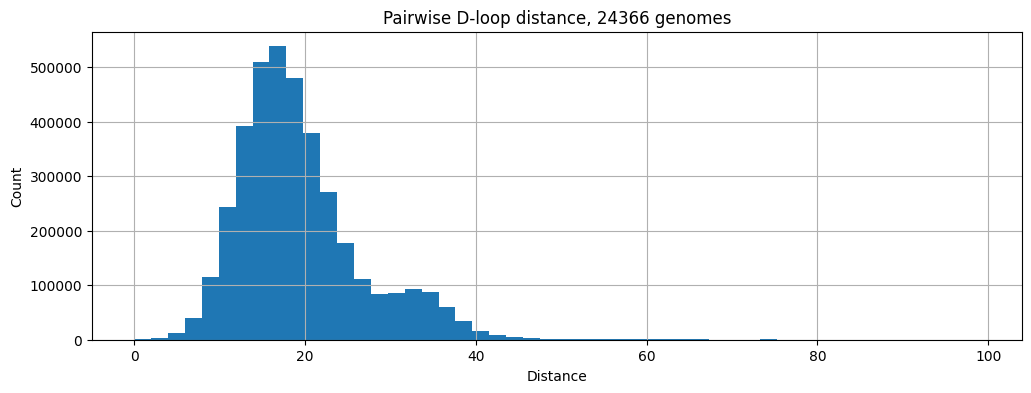

In [15]:
plt.figure(figsize=(12, 4))
df[df.dist < 100].dist.hist(bins=50)
# df.dist.hist(bins=50)
plt.title(f"Pairwise D-loop distance, {len(dloops)} genomes")
plt.xlabel("Distance")
plt.ylabel("Count")
# plt.xscale("log")
plt.show()

In [11]:
df[df.dist == 0]

,id1,id2,dist
435,OP830489.1,ON597814.1,0
437,OP830489.1,ON597812.1,0
438,OP830489.1,ON597811.1,0
439,OP830489.1,ON597810.1,0
441,OP830489.1,ON597808.1,0
...,...,...,...
3861475,OM638263.1,OM638261.1,0
3861479,OM638263.1,OM638257.1,0
3909888,OM638261.1,OM638257.1,0
4103489,OM638253.1,OM638252.1,0


In [12]:
df[df.dist == 0].shape[0] / df.shape[0]

5.780687490840659e-05